Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6262 - loss: 0.7143 - val_accuracy: 0.6703 - val_loss: 0.5329
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6503 - loss: 0.5172 - val_accuracy: 0.7912 - val_loss: 0.3915
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8100 - loss: 0.4050 - val_accuracy: 0.8901 - val_loss: 0.3062
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9349 - loss: 0.3211 - val_accuracy: 0.9231 - val_loss: 0.2541
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9158 - loss: 0.2747 - val_accuracy: 0.9451 - val_loss: 0.2176
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9338 - loss: 0.2374 - val_accuracy: 0.9451 - val_loss: 0.1915
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9374 - loss: 0.1960 - val_accuracy: 0.9451 - val_loss: 0.1718
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9565 - loss: 0.1621 - val_accuracy: 0.9451 - val_los

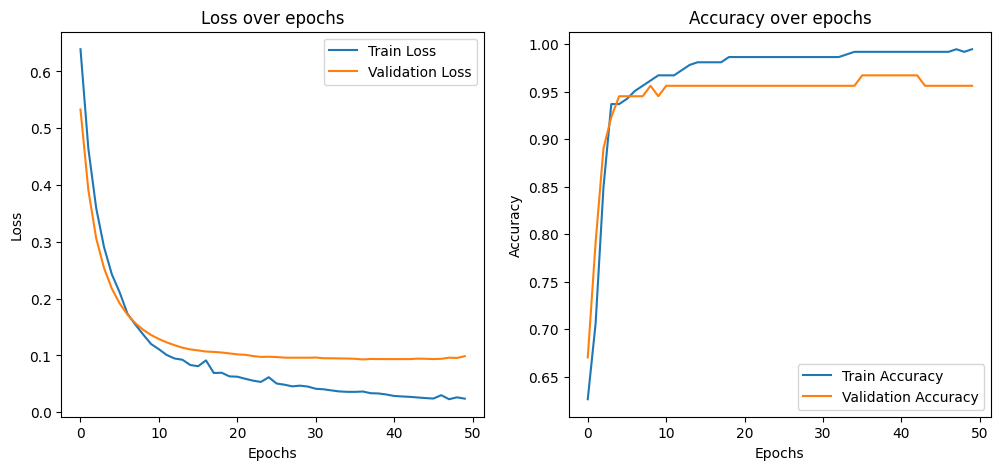

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 1: Load the Breast Cancer Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # Labels: 0 = Malignant, 1 = Benign (binary classification)

# Step 2: Preprocessing
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Model Development - Define the Network Architecture
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(X_train.shape[1],)),  # Changed from input_shape to shape
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer 1
    tf.keras.layers.Dense(16, activation='relu'),  # Hidden layer 2
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model with Binary Cross-Entropy Loss and Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Model Training
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Step 5: Evaluation on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")  # Convert probabilities to 0 or 1

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Step 6: Plotting the loss and accuracy curves over epochs
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.show()


Hello
